# Assignment 2

To be delivered until 2024/12/23 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="temp_photo_cropped.png" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

In [1]:
// Define sensor pins
const int tempSensorPin = A1; // Temperature sensor connected to analog pin A0
const int lightSensorPin = A0; // Photoresistor connected to analog pin A1

void setup() {
  Serial.begin(9600); // Initialize serial communication at 9600 bps
}

void loop() {
  // Read the temperature sensor value
  int tempRaw = analogRead(tempSensorPin);
  float voltage = tempRaw * (5.0 / 1024.0); // Convert to voltage
  float temperature = voltage * 100.0;     // Convert voltage to Celsius for LM35

  // Read the light sensor value
  int luminance = analogRead(lightSensorPin); // Get the raw value (0-1023)

  // Print temperature and luminance to the serial monitor
  Serial.print(temperature);
  Serial.print(';');
  Serial.println(luminance);

  // Wait 200 milliseconds (5 times per second)
  delay(200);
}

SyntaxError: invalid syntax (4256439322.py, line 1)

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [ ]:
import serial
import time

ser = serial.Serial('COM3', 9600, timeout=1)
time.sleep(2)

data = []
for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        data.append(string)

ser.close()
print(data)

['21.02;271\r\n', '19.06;274\r\n', '19.55;275\r\n', '22.48;270\r\n', '21.51;272\r\n', '19.06;269\r\n', '20.53;227\r\n', '20.04;227\r\n', '21.02;223\r\n', '20.53;205\r\n', '20.04;209\r\n', '20.53;225\r\n', '20.53;216\r\n', '20.53;189\r\n', '21.02;176\r\n', '21.02;151\r\n', '21.02;150\r\n', '21.02;146\r\n', '20.53;147\r\n', '21.02;148\r\n', '21.02;160\r\n', '21.02;172\r\n', '20.53;241\r\n', '22.97;273\r\n', '20.53;278\r\n', '22.97;279\r\n', '20.53;282\r\n', '22.48;301\r\n', '19.55;284\r\n', '21.51;289\r\n', '19.55;275\r\n', '21.02;278\r\n', '19.55;287\r\n', '21.51;287\r\n', '19.06;287\r\n', '21.02;281\r\n', '19.55;281\r\n', '21.99;283\r\n', '19.06;283\r\n', '20.53;281\r\n', '22.97;278\r\n', '19.55;270\r\n', '19.55;271\r\n', '19.06;273\r\n', '20.53;274\r\n', '19.06;281\r\n', '20.53;284\r\n', '22.97;278\r\n', '20.04;277\r\n', '20.53;292\r\n', '21.02;301\r\n', '22.48;261\r\n', '22.48;266\r\n', '22.97;271\r\n', '23.46;275\r\n', '21.02;276\r\n', '19.06;286\r\n', '19.06;302\r\n', '18.57;305\r\

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [ ]:
import pandas as pd
# Parse the data
parsed_data = []
time_step = 0.2  # Time increment in seconds
time = 0.0       # Start time

for line in data:
    line = line.strip()  # Remove '\r\n'
    temperature, luminance = map(float, line.split(';'))
    parsed_data.append([temperature, int(luminance), round(time, 2)])
    time += time_step

# Create a DataFrame
df = pd.DataFrame(parsed_data, columns=['Temperature', 'Luminance', 'Time'])

# Save to CSV
df.to_csv("sensor_data.csv", index=False)

print("Data saved to sensor_data.csv")


Data saved to sensor_data.csv


Plot the Temperature against time, the luminance against time and the temperature against the luminance.

<Axes: xlabel='Luminance'>

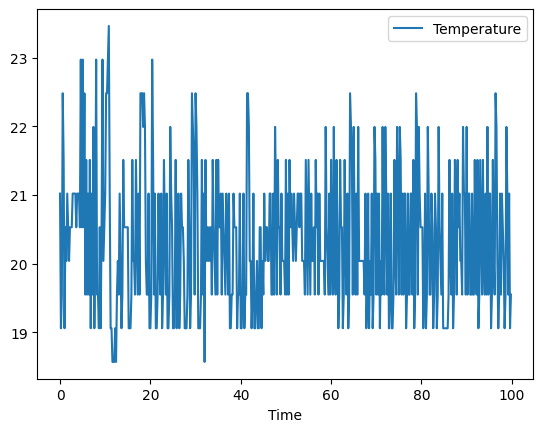

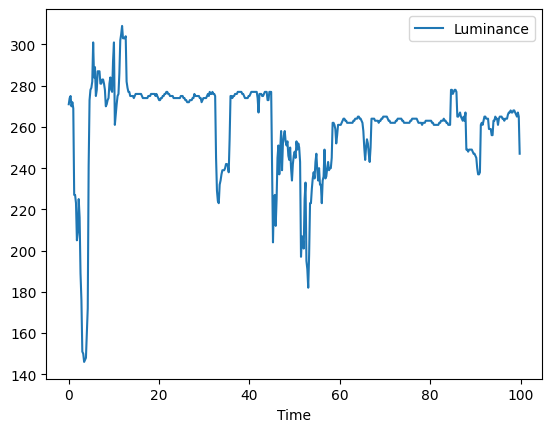

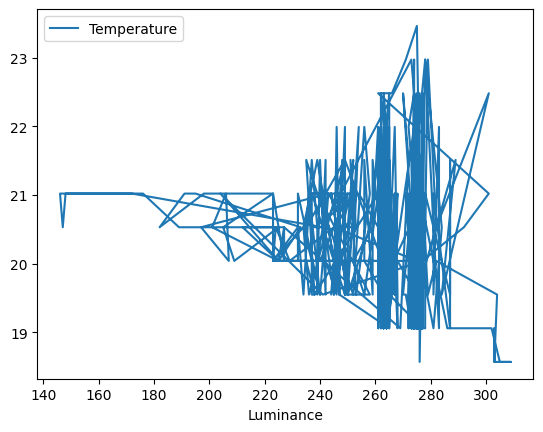

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jonaspinas/Assignment/refs/heads/main/sensor_data.csv'
Sensor = pd.read_csv(url)

Sensor.plot(x = "Time", y = "Temperature")

Sensor.plot(x = "Time", y = "Luminance")

Sensor.plot(x = "Luminance", y = "Temperature")





Comment: From the plotted variables, it is clearly noticeable that the temperature sensor resolution (of about $0.5 ºC$ ) is quite low to obtain a decent model, especially when compared with the maximum amplitude of the temperature ( $\Delta_{T}, = 5ºC$ ).

## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [1]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='1234',
                    port=5432)


#Create a cursor object using the cursor() method
cursor = conn.cursor()

#Execute a SQL function using the execute() method
cursor.execute("select version()")

# Fetch a single row using fetchone() method
data = cursor.fetchone()
print("Connection established to: ", data)

Connection established to:  ('PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.42.34433, 64-bit',)


**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

In [2]:
#We could add the connection to this function but beacause it is no asked we decided not to
'''
db_params = {
        "host": "localhost",
        "database": "mimic-iii",
        "user": "postgres",
        "password": "1234"
    }

def query_to_dataframe(query, db_params):
    try:
        # Establish the database connection
        conn = psycopg2.connect(
            host=db_params.get("host"),
            database=db_params.get("database"),
            user=db_params.get("user"),
            password=db_params.get("password"),
            port=db_params.get("port", 5432)  # Default port 5432
        )


'''
def query_to_dataframe(query):
    try:
#'''
            # Create a cursor and execute the query
        with conn.cursor() as cursor:
            cursor.execute(query)

            # Fetch column names
            col_names = [desc[0] for desc in cursor.description]

            # Fetch all rows
            rows = cursor.fetchall()

        # Create a pandas DataFrame
        df = pd.DataFrame(rows, columns=col_names)
        return df

    except Exception as e:
        print(f"Error: {e}")
        return None

    finally:
        # Ensure the connection is closed
        if 'conn' in locals() and conn:
            conn.close()

**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

In [3]:
sql_query = """
SELECT *
FROM admissions
WHERE admission_type = 'EMERGENCY'
  AND insurance = 'Private';
"""

df = query_to_dataframe(sql_query)
print(df)

    row_id  subject_id  hadm_id           admittime           dischtime  \
0    12263       10011   105331 2126-08-14 22:32:00 2126-08-28 18:59:00   
1    12317       10067   160442 2130-10-06 01:34:00 2130-10-06 02:29:00   
2    12339       10088   149044 2107-05-12 18:00:00 2107-05-18 13:30:00   
3    12341       10090   176805 2124-01-12 14:26:00 2124-01-14 19:00:00   
4    12349       10098   180685 2170-12-02 23:24:00 2170-12-03 15:55:00   
5    12357       10106   133283 2161-09-14 22:22:00 2161-09-19 17:00:00   
6    12368       10117   187023 2138-06-05 17:23:00 2138-06-11 10:16:00   
7    12369       10117   105150 2138-11-09 18:08:00 2138-11-18 23:13:00   
8    12381       10126   160445 2171-07-12 06:02:00 2171-08-16 12:00:00   
9    12382       10127   182839 2198-06-28 05:34:00 2198-07-20 14:56:00   
10   12385       10130   156668 2161-01-30 16:26:00 2161-02-19 14:05:00   
11   39869       40310   186361 2144-07-11 15:02:00 2144-11-12 14:40:00   
12   39962       40601   

**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

In [4]:
sql_query = """
SELECT admissions.subject_id, admissions.hadm_id, admissions.deathtime, drgcodes.description
FROM admissions
INNER JOIN drgcodes ON admissions.hadm_id = drgcodes.hadm_id
WHERE admissions.admission_type = 'EMERGENCY'
  AND admissions.insurance = 'Private';
"""

df = query_to_dataframe(sql_query)
print(df)

    subject_id  hadm_id           deathtime  \
0        10130   156668                 NaT   
1        10117   187023                 NaT   
2        10011   105331 2126-08-28 18:59:00   
3        10117   105150 2138-11-18 23:13:00   
4        10106   133283                 NaT   
5        10126   160445 2171-08-16 12:00:00   
6        10126   160445 2171-08-16 12:00:00   
7        10088   149044                 NaT   
8        10098   180685 2170-12-03 15:55:00   
9        10098   180685 2170-12-03 15:55:00   
10       10067   160442 2130-10-06 02:29:00   
11       10127   182839                 NaT   
12       10127   182839                 NaT   
13       10090   176805                 NaT   
14       10090   176805                 NaT   
15       43881   172454                 NaT   
16       43881   172454                 NaT   
17       43881   172454                 NaT   
18       43881   167021                 NaT   
19       43881   167021                 NaT   
20       4388

**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [5]:
#create a connection
conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='1234',
                    port=5432)

query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"
df = query_to_dataframe(query)
print(df)

     subject_id  hadm_id  icustay_id  aniongap_min  aniongap_max  albumin_min  \
0         10006   142345      206504          12.0          20.0          2.7   
1         10011   105331      232110          12.0          12.0          2.6   
2         10013   165520      264446          13.0          13.0          NaN   
3         10017   199207      204881          13.0          13.0          2.8   
4         10019   177759      228977          20.0          46.0          3.2   
..          ...      ...         ...           ...           ...          ...   
123       44083   198330      286428          16.0          16.0          NaN   
124       44154   174245      217724          15.0          15.0          NaN   
125       44212   163189      239396          15.0          21.0          2.9   
126       44222   192189      238186          11.0          15.0          NaN   
127       44228   103379      217992          12.0          18.0          2.2   

     albumin_max  bands_min

**5.2.** Close the connection to your SQL server.

In [6]:
conn.close()
print("Connection closed.")

Connection closed.


**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, auc, roc_curve, make_scorer, roc_auc_score

Ndf = df.drop(['subject_id', 'hadm_id', 'icustay_id'], axis=1, inplace=False)
Ndf.dropna(axis=1, inplace=True)
Ndf = pd.get_dummies(Ndf)
Y = Ndf['hospital_expire_flag']
X = Ndf.drop(['hospital_expire_flag'], axis=1)



**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

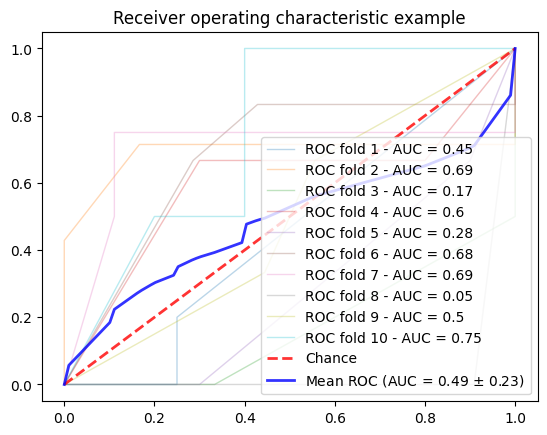

In [14]:
seed = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

lf_dt = DecisionTreeClassifier(max_depth=6)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)
fig, ax = plt.subplots()

for i, (train,test) in enumerate(kfold.split(X,Y)):
    lf_dt.fit(X.loc[train], Y[train])
    y_proba = lf_dt.predict_proba(X.loc[test])
    fpr, tpr, _ = roc_curve(Y[test], y_proba[:,1])

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0

    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))

    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

**b.** Random forest

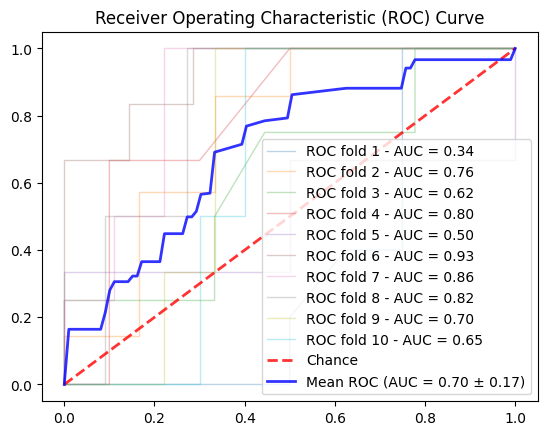

In [15]:
# Set random seed
seed = 10

# KFold cross-validation with 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Random Forest Classifier
clf_rfc = RandomForestClassifier(n_estimators=200, random_state=seed)

# Prepare lists for TPR (True Positive Rate) and AUC (Area Under Curve)
tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

# Create figure for plotting
fig, ax = plt.subplots()

# KFold cross-validation loop
for i, (train, test) in enumerate(kfold.split(X, Y)):
    # Train the model on training data
    clf_rfc.fit(X.loc[train], Y.iloc[train])

    # Predict probabilities for the test data
    y_proba = clf_rfc.predict_proba(X.loc[test])

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(Y.iloc[test], y_proba[:, 1])

    # Interpolate TPR to mean FPR
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0  # Ensure the first point is (0, 0)

    # Append the TPR and AUC for this fold
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))

    # Plot the ROC curve for this fold
    ax.plot(fpr, tpr, label=f'ROC fold {i+1} - AUC = {aucs[-1]:.2f}', lw=1, alpha=0.3)

# Plot the chance line (diagonal)
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

# Calculate the mean and standard deviation of the TPRs and AUCs
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # Ensure the last point is (1, 1)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
ax.plot(mean_fpr, mean_tpr, color="b", label=f"Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2, alpha=0.8)

# Set the plot limits and title
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver Operating Characteristic (ROC) Curve")
ax.legend(loc="lower right")

# Display the plot
plt.show()

**c.** Gradient Boosting

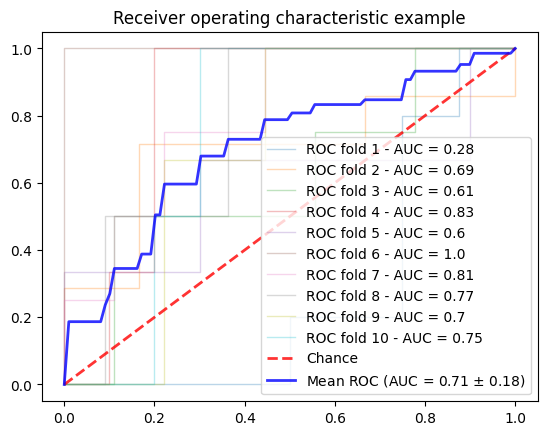

In [16]:
seed = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

lf_dt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)
fig, ax = plt.subplots()

for i, (train,test) in enumerate(kfold.split(X,Y)):
    lf_dt.fit(X.loc[train], Y[train])
    y_proba = lf_dt.predict_proba(X.loc[test])
    fpr, tpr, _ = roc_curve(Y[test], y_proba[:,1])

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0

    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))

    ax.plot(
        fpr, tpr,
        label='ROC fold ' + str(i+1) +  ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
        lw=1,
        alpha=0.3)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.15, 'n_estimators': 50}
Best AUC: 0.8001157407407409


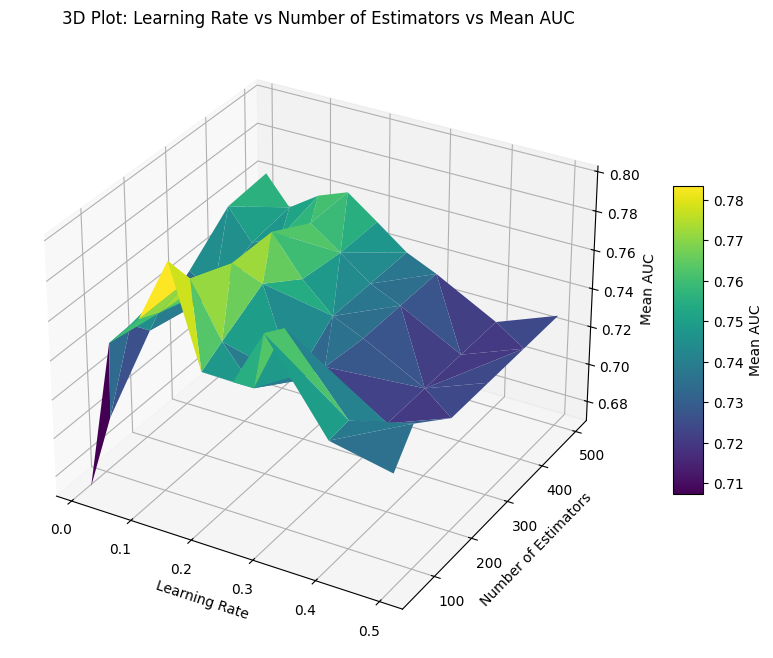

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the parameter grid for learning rate and number of estimators
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5],
    'n_estimators': [50, 100, 200, 300, 400, 500]
}

# Instantiate the GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)

# GridSearchCV with AUC as the scoring metric
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='roc_auc',  # Use AUC as the scoring metric
    n_jobs=-1,  # Use all available cores for parallel processing
    verbose=1
)

# Fit the model to the data
grid_search.fit(X, Y)

# Convert cross-validation results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

# Extract data for the 3D plot
x = cv_results['param_learning_rate'].astype(float)
y = cv_results['param_n_estimators'].astype(int)
z = cv_results['mean_test_score']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot or surface plot
surf = ax.plot_trisurf(x, y, z, cmap=cm.viridis, edgecolor='none')

# Add labels and color bar
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('Mean AUC')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Mean AUC')
plt.title('3D Plot: Learning Rate vs Number of Estimators vs Mean AUC')
plt.show()

**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

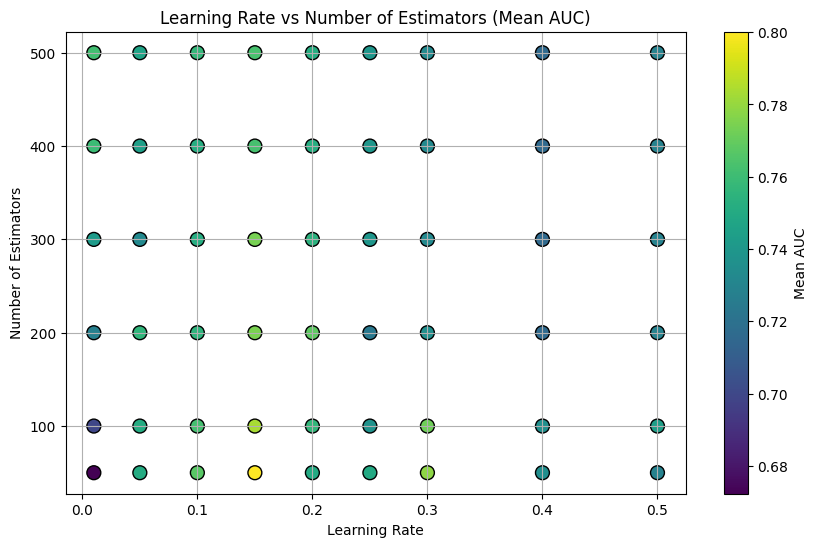

In [18]:
# Convert parameters to float and int for proper plotting
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype(float)
cv_results['param_n_estimators'] = cv_results['param_n_estimators'].astype(int)

plt.figure(figsize=(10, 6))

# Create a scatterplot with a color gradient based on Mean AUC
scatter = plt.scatter(
    cv_results['param_learning_rate'],
    cv_results['param_n_estimators'],
    c=cv_results['mean_test_score'],
    cmap='viridis',
    edgecolor='k',
    s=100
)

# Add a color bar to show the AUC gradient
plt.colorbar(scatter, label='Mean AUC')

# Label the axes
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('Learning Rate vs Number of Estimators (Mean AUC)')
plt.grid(True)
plt.show()

**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

In [19]:
from sklearn.model_selection import cross_val_score
# Best parameters from Grid Search
best_params = {
    'learning_rate': 0.15,
    'n_estimators': 50,
    'max_depth': 3,
    'random_state': 10
}

# Initialize the model with the best parameters
clf = GradientBoostingClassifier(**best_params)

# Initialize variables for stepwise selection
selected_features = []
remaining_features = list(X.columns)
best_auc = 0
improvement_threshold = 0.01  # Minimum improvement to continue adding features

print("Starting forward stepwise selection...\n")

# Iteratively select features
while remaining_features:
    performance = {}
    for feature in remaining_features:
        current_features = selected_features + [feature]
        scores = cross_val_score(clf, X[current_features], Y, cv=5, scoring='roc_auc')
        performance[feature] = np.mean(scores)

    # Find the feature with the best performance
    best_feature = max(performance, key=performance.get)
    best_feature_auc = performance[best_feature]

    print(f"Evaluating feature: {best_feature}, AUC: {best_feature_auc:.4f}")

    # Check if the performance improves significantly
    if best_feature_auc - best_auc > improvement_threshold:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_auc = best_feature_auc
        print(f"Selected feature: {best_feature}, Updated AUC: {best_auc:.4f}\n")
    else:
        print("No significant improvement. Stopping selection.\n")
        break

print("Selected features:", selected_features)

Starting forward stepwise selection...

Evaluating feature: admission_age, AUC: 0.7111
Selected feature: admission_age, Updated AUC: 0.7111

Evaluating feature: wbc_max, AUC: 0.7680
Selected feature: wbc_max, Updated AUC: 0.7680

Evaluating feature: sodium_min, AUC: 0.7799
Selected feature: sodium_min, Updated AUC: 0.7799

Evaluating feature: eth_grp_hispanic, AUC: 0.7893
No significant improvement. Stopping selection.

Selected features: ['admission_age', 'wbc_max', 'sodium_min']


**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

In 8.1, by the forward stepwise selection, with a minimum AUC improvement per feature of 0.01 AUC, a model was created with k = 3, with an AUC of 0.7893 . In 7.2 by a grid search, the best AUC found was of around 0.80 that utilized 50 parameters (k=50). To know which model is more likely to have a better $R^2$ test score (and avoid overfitting), some performance indexes can be applied, like $C_{p}$, AIC, BIC, and Ajusted $R^2$ (In this case $C_{p}$ = AIC, because this is a linear model). I our case, these performance indexes appoint that the best model is the 3 parameter model obtained in 8.1.

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?

The model with the lowest RSS will be the best subset selection because it will try all the possible combinations of predictors for each k. This is not always good because low training RSS may not mean the lowest test error. Also, it can lead to overfitting as well as numerical problems for larger values of p.

**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?

Any of the three models can have the smallest test RSS. As mentioned, the best subset model has a higher chance of overfitting, especially for larger p values, but this is not always the case. Overall it depends on the dataset and the value of both n, p and the number of predictors. Backward  Stepwise Selection requires $n > p$, while this isn't the case for Best Subset Selection and Forward Stepwise Selection. To combat overfitting some performance indexes like AIC, BIC, adjusted $R^2$ and others should be used, in orther to have a balance beetween a low RSS and a low number of predictors (a model with a high number of predictors is more likely to overfit, and so, give a better train RSS and worse test RSS).

**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

**True**, because forward stepwise selection chooses the predictor that, at each step, gives the greatest improvement to the model. A (k+1)-variable model will include all the predictors of a k-variable model, a (k−1)-variable model and so on and so forth.

    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.

**True**, because in the backward stepwise selection the model starts containing all predictors (we can call it a p-variable model), then from this model the least significant predictor is removed, obatining a new model(so a (p-1)-variable model). The procedure is now repeated for the new model.So, it can be assumed that a k-variable model has a subset of the predictors in the (k+1)-variable model.



    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

**False**, it can be that forward stepwise selection first adds predictors that seem important based on their isolated performance, but these same predictors might later be removed in backward stepwise selection because they don’t contribute significantly when all predictors are included in the model. So the statement can be true in some cases but not necessarily.

    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

**False**, for the same reason.


    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

**False**, his method fits all possible combinations of predictors for each k, so it is obvious that k+1 may have a completely different set of predictors than k.

**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.

$n = 2, p = 2$,  
$x_{11} = x_{12}$,  
$x_{21} = x_{22}$,  
$y_{1} + y_{2} = 0$,  

$min ((y_{1}-(x_{11}\times\beta_{1}+x_{12}\times\beta_{2}))^2+(y_{2}-(x_{21}\times\beta_{1}+x_{22}\times\beta_{2}))^2) + \lambda(\beta_{1}^2+\beta_{2}^2)$

$min ((y_{1}-x_{11}(\beta_{1}+\beta_{2}))^2+(y_{2}-x_{21}(\beta_{1}+\beta_{2}))^2) + \lambda(\beta_{1}^2+\beta_{2}^2)$

$min ((y_{1}-x_{11}(\beta_{1}+\beta_{2}))^2+(-y_{1}+x_{11}(\beta_{1}+\beta_{2}))^2) + \lambda(\beta{1}^2+\beta{2}^2)$

(o segundo membro é igual ao primeiro mas com sinal negativo, no entanto como está elevado a dois podemos remover o sinal)

$min (2(y_{1}-x_{11}(\beta_{1}+\beta_{2}))^2 + \lambda(\beta_{1}^2+\beta_{2}^2))$

**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

We will define the problem above as function $F$, we will then get the expression for $\frac{\delta F}{\delta \beta_{1}}$ and $\frac{\delta F}{\delta \beta_{2}}$:

$\frac{\delta F}{\delta \beta_{1}} = -4 \times x_{11}(-x_{11}(\beta_{1}+\beta_{2})+y_{1}) + 2 \lambda\beta_{1}$    
  
$\frac{\delta F}{\delta \beta_{1}} = 4 x_{11}^2(\beta_{1}+\beta_{2}) - 4 y_{1}+ 2 \lambda\beta_{1}$
  
If we do the same in order to $\beta_{2}$:
  
$\frac{\delta F}{\delta \beta_{2}} = 4 x_{11}^2(\beta_{1}+\beta_{2}) - 4 y_{1}+ 2 \lambda\beta_{2}$
 
Setting both partial derivatives to zero $\frac{\delta F}{\delta \beta_{1}} = 0, \frac{\delta F}{\delta \beta_{2}} = 0,$ and comparing both expressions:
  
$4 x_{11}^2(\beta_{1}+\beta_{2}) - 4 y_{1}+ 2 \lambda\beta_{1}= 4 x_{11}^2(\beta_{1}+\beta_{2}) - 4 y_{1}+ 2 \lambda\beta_{2} = 0$
  
$ \lambda\beta_{1} = \lambda\beta_{2} = 0$
  
$ \lambda\beta_{1} - \lambda\beta_{2} = 0$
  
$ \lambda(\beta_{1} -\beta_{2}) = 0$
  
$\lambda > 0,$ so this implies that $\beta_{1} = \beta_{2}$
  
It can be said that, in this setting, the ridge regression coefficient estimates that $\hat{\beta}_1 = \hat{\beta}_2$.

**c)** Write the lasso regression optimization problem in this setting.

$n = 2, p = 2$,  
$x_{11} = x_{12}$,  
$x_{21} = x_{22}$,  
$y_{1} + y_{2} = 0$,

$min ((y_{1}-(x_{11}\times\beta_{1}+x_{12}\times\beta_{2}))^2+(y2-(x21\times\beta_{1}+x22\times\beta_{2}))^2) + \lambda(|\beta_{1}|+|\beta_{2}|)$

$min ((y_{1}-2\times x_{11}(\beta_{1}+\beta_{2}))^2+(y_{2}-2\times x_{21}(\beta_{1}+\beta_{2}))^2) + \lambda(|\beta_{1}|+|\beta_{2}|)$

$min ((y_{1}-2\times x_{11}(\beta_{1}+\beta_{2}))^2+(-y_{1}+2\times x_{11}(\beta_{1}+\beta_{2}))^2) + \lambda(|\beta_{1}|+|\beta_{2}|)$

(o segundo membro é igual ao primeiro mas com sinal negativo, no entanto como está elevado a dois podemos remover o sinal)

$min (2\times(y_{1}-2\times x_{11}(\beta_{1}+\beta_{2}))^2 + \lambda(|\beta_{1}|+|\beta_{2}|))$

**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.

If the same steps of 2.b) are followed, but for the lasso regression optimization:

$\lambda (|\beta{1}|-|\beta{2}|) = 0$

So in this case, minimization is achieved with $|\beta{1}|=|\beta{2}|$, which means that $\beta{1} = \beta{2},$ or $\beta{1} = -\beta{2}$, so the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique.
  


**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

Answer: Tree.jpg on the folder delivered.

**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

C:\Users\jguip\AppData\Local\Temp\ipykernel_11324\3757467702.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x1, x2, circle_values, levels=[4, 200], colors=['xkcd:salmon'], alpha=0.5, label="Outside Circle")
C:\Users\jguip\AppData\Local\Temp\ipykernel_11324\3757467702.py:23: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(x1, x2, circle_values, levels=[0, 4], colors=['blue'], alpha=0.5, label="Inside Circle")
C:\Users\jguip\AppData\Local\Temp\ipykernel_11324\3757467702.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, circle_values, levels=[4], colors='blue', label="Circle Boundary")


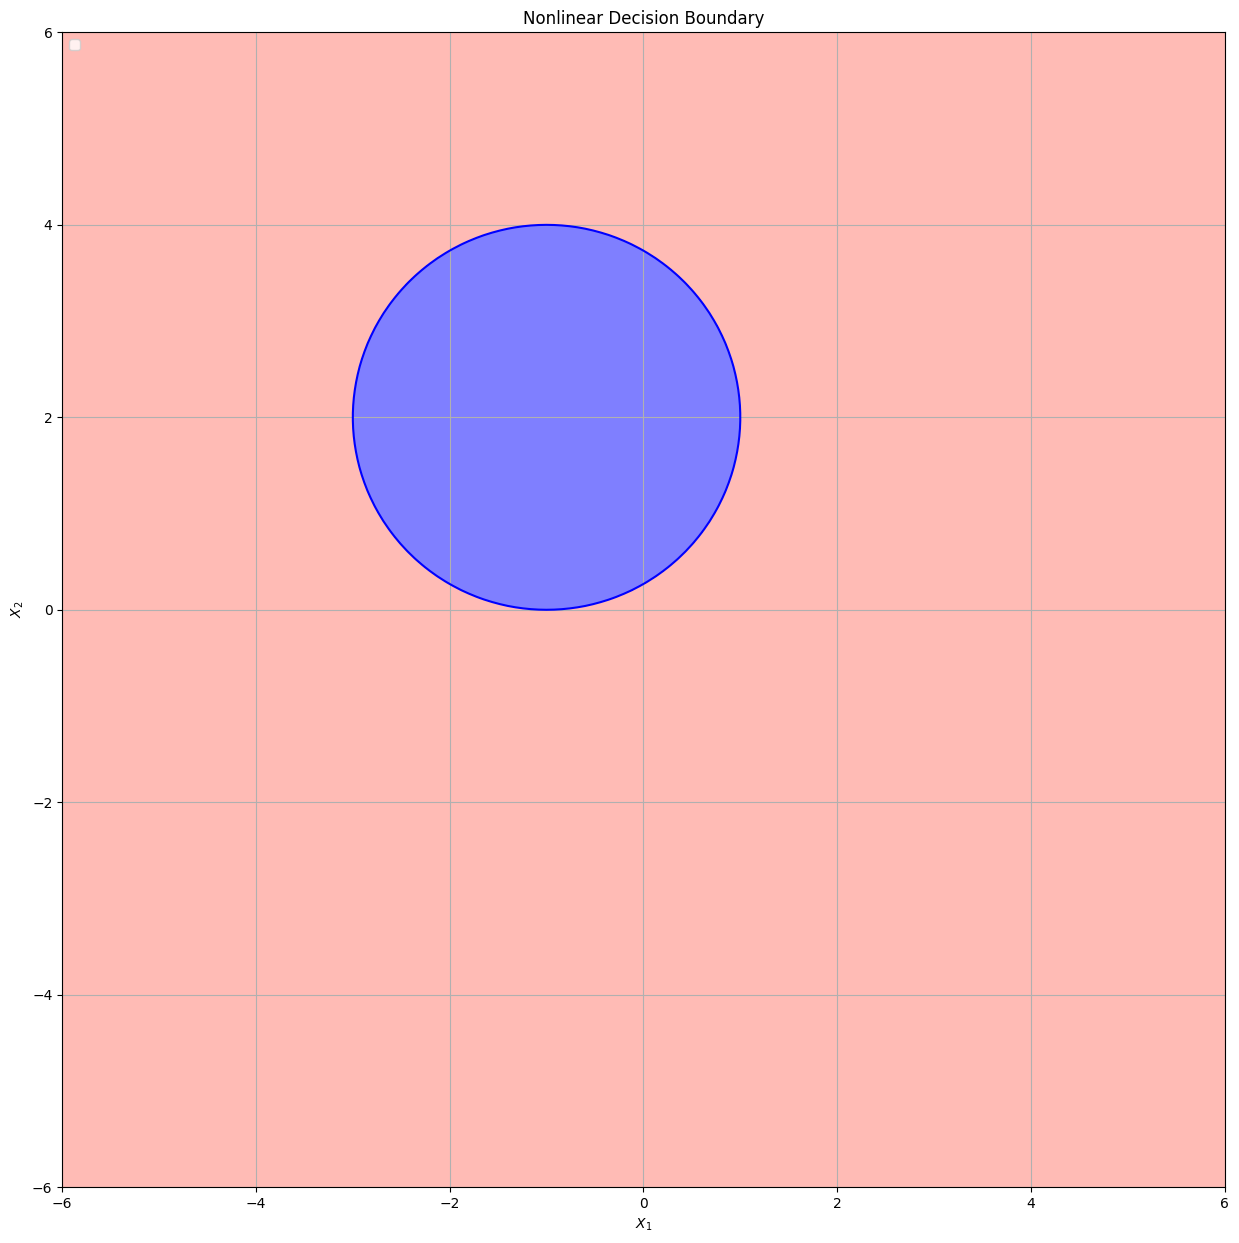

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the circle equation
def evaluate_circle(x1, x2):
    return (1 + x1)**2 + (2 - x2)**2

# Generate a grid of points
x1_range = np.linspace(-20, 20, 500)
x2_range = np.linspace(-20, 20, 500)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Evaluate the circle equation for each point
circle_values = evaluate_circle(x1, x2)

# Create a plot
plt.figure(figsize=(15, 15))

# Region where (1 + X1)^2 + (2 - X2)^2 > 4
plt.contourf(x1, x2, circle_values, levels=[4, 200], colors=['xkcd:salmon'], alpha=0.5, label="Outside Circle")

# Region where (1 + X1)^2 + (2 - X2)^2 <= 4
plt.contourf(x1, x2, circle_values, levels=[0, 4], colors=['blue'], alpha=0.5, label="Inside Circle")

# Decision boundary (the circle itself)
plt.contour(x1, x2, circle_values, levels=[4], colors='blue', label="Circle Boundary")

# Add labels and styling
plt.title("Nonlinear Decision Boundary")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(["Circle Boundary", "Inside Circle", "Outside Circle"], loc="upper left")
plt.axis([-6,6,-6,6])  # Equal aspect ratio
plt.grid()
plt.show()

**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)

If the points coordinates are substituted in the decision boundary expression:

$(1+0)^2 + (2-0)^2 = 1^2 + 2^2 = 5,$ &nbsp;&nbsp;&nbsp;  $5>4,$ so $(0,0)$ is blue.

$(1-1)^2 + (2-1)^2 = 0^2 + 1^2 = 1,$ &nbsp;&nbsp;&nbsp; $1\leq 4,$ so $(-1,1)$ is red.

$(1+2)^2 + (2-2)^2 = 3^2 + 0^2 = 9,$ &nbsp;&nbsp;&nbsp; $9> 4,$ so $(2,2)$ is blue.

$(1+3)^2 + (2-8)^2 = 4^2 + (-6)^2 = 52,$ &nbsp;&nbsp;&nbsp; $52>4,$ so $(0,0)$ is blue.

**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

A p-linear decision boundary has the form:

$$ \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + ... + \beta_{p} X_{p} = 0$$

In this case, to make the decision boundary linear, the form requires and enlargement of the space of features including the transformations $X_1^2$ and $X_2^2$, so the decision boundary will go from a 2-dimensional space to a 4-dimensional space. This results in non linear decision boundaries in the original 2D space:

$$ \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \beta_{3} X_{1}^2 + \beta_{4} X_{2}^2 = 0$$

If the original decision boundary is taken and resolved:

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$
$$ 1 + 2 X_{1} + 1 X_{1}^2 +4-4 X_{2} + 1 X_{2}^2 = 4$$
$$ 1 + 2 X_{1} -4 X_{2} + 1 X_{1}^2 + 1 X_{2}^2 = 0$$

The last expression is a linear decision boundary in terms of [$X_1$, $X_1^2$, $X_2$, $X_2^2$], with  a $\beta$ Vector of $\beta = [1,2,-4,1,1]$

# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?

While relational databases store in the shape of tables and joints, graph databases store data in the shape of a graph, consisting of nodes and relationships beetween those nodes. This makes graph databeses ideal to understand complex data systems, and look for patterns in the data. Some graph database management systems like Neo4J have a native graph data storage and data proccessing (basically the data storage arquitecture is NOT build on top of tables), this makes some computer intensive queries that require a lot of "hops" and "indexing" less intensive, by utilizing a traceable data starting point. Due to these differences in the data storage architecture, graph databases like Neo4j utilize a different querry language like Cypher.

In sum graph databases are a great tool that should be used for highly connected data problems. For problems with well-defined relationships, like financial transactions, physics laboratory studies, inventory and others.